In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 导入数据

In [2]:
file_list = os.listdir('data')
data = pd.DataFrame()
for file in file_list:
    df= pd.read_excel(f'data/{file}',index_col=0)
    data = data.append(df)
data.shape

C:\Users\31815\AppData\Local\Temp\ipykernel_15388\3045440457.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
C:\Users\31815\AppData\Local\Temp\ipykernel_15388\3045440457.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
C:\Users\31815\AppData\Local\Temp\ipykernel_15388\3045440457.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
C:\Users\31815\AppData\Local\Temp\ipykernel_15388\3045440457.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
C:\Users\31815\AppData\Local\Temp\ipykernel_15388\3045440457.py:5: FutureWarning: The frame.append m

(18514, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18514 entries, 228757275 to 226378735
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   district   18514 non-null  object 
 1   roomnum    18514 non-null  int64  
 2   hall       18514 non-null  int64  
 3   AREA       18514 non-null  float64
 4   C_floor    18514 non-null  object 
 5   floor_num  18514 non-null  int64  
 6   school     18514 non-null  int64  
 7   subway     18514 non-null  int64  
 8   per_price  18514 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.4+ MB


In [4]:
data.describe()

,roomnum,hall,AREA,floor_num,school,subway,per_price
count,18514.000000,18514.000000,18514.000000,18514.000000,18514.000000,18514.000000,18514.000000
mean,2.873339,1.812844,95.224924,27.482338,0.587447,0.504159,6.118192
std,1.040839,0.484765,48.570130,10.083653,0.492307,0.499996,3.050218
min,1.000000,0.000000,15.000000,1.000000,0.000000,0.000000,1.010100
25%,2.000000,2.000000,70.800000,23.000000,0.000000,0.000000,4.052600
50%,3.000000,2.000000,88.000000,30.000000,1.000000,1.000000,5.246300
75%,3.000000,2.000000,103.687500,33.000000,1.000000,1.000000,7.357400
max,9.000000,6.000000,697.200000,90.000000,1.000000,1.000000,26.396800


# 数据清洗

In [5]:
data.sort_values('per_price',ascending=True,inplace=True)
data

,district,roomnum,hall,AREA,C_floor,floor_num,school,subway,per_price
Unnamed: 0,,,,,,,,,
228525652,longhua,2,2,79.20,middle,8,0,0,1.0101
228525545,longhua,2,1,79.03,middle,6,0,0,1.0123
228872761,dapengxinqu,3,2,71.50,middle,15,0,0,1.0210
228869853,dapengxinqu,3,2,70.20,low,20,0,0,1.0256
228251431,longhua,2,1,79.03,middle,6,0,0,1.0376
...,...,...,...,...,...,...,...,...,...
228966254,nanshan,4,2,207.75,high,31,1,1,22.1420
228971607,nanshan,3,1,331.76,middle,35,0,1,22.6067
227473874,nanshan,3,1,331.76,middle,35,0,1,22.6067


In [6]:
# 查看重复数据的总条数
data.duplicated().sum()

2065

In [7]:
# 删除重复数据
data.drop_duplicates(keep='first',inplace=True)
data.shape

(16449, 9)

In [8]:
# 数据去重
dist_list = data['district'].unique()
for i,item in enumerate(dist_list):
    pass
dict_dist = {item:i for i,item in enumerate(dist_list)}
dict_dist

{'longhua': 0,
 'dapengxinqu': 1,
 'pingshan': 2,
 'guangming': 3,
 'luohu': 4,
 'baoan': 5,
 'nanshan': 6,
 'yantian': 7,
 'futian': 8,
 'longgang': 9}

In [9]:
dist_dict = {'longgang':'龙岗','longhua':'龙华',
             'baoan':'宝安','nanshan':'南山',
             'futian':'福田','luohu':'罗湖',
             'pingshan':'坪山','guangming':'光明',
             'yantian':'盐田','dapengxinqu':'大鹏新区'}
data['district'] = data['district'].map(dist_dict)
data

,district,roomnum,hall,AREA,C_floor,floor_num,school,subway,per_price
Unnamed: 0,,,,,,,,,
228525652,龙华,2,2,79.20,middle,8,0,0,1.0101
228525545,龙华,2,1,79.03,middle,6,0,0,1.0123
228872761,大鹏新区,3,2,71.50,middle,15,0,0,1.0210
228869853,大鹏新区,3,2,70.20,low,20,0,0,1.0256
228251431,龙华,2,1,79.03,middle,6,0,0,1.0376
...,...,...,...,...,...,...,...,...,...
227529055,宝安,4,2,93.59,high,28,1,1,21.9040
228996159,南山,4,2,207.75,high,31,1,1,22.1420
228971607,南山,3,1,331.76,middle,35,0,1,22.6067


# 房源单价的分布情况

Text(0.5, 1.0, '平米单价直方图')

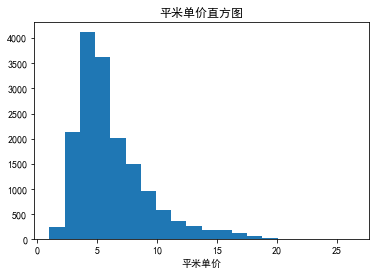

In [10]:
# 直方图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
data.columns=['区域','房间数','厅数','面积','楼层位置',
              '楼层数','是否是学区房','地铁','平米单价'] # 修改列名
plt.hist(data['平米单价'],bins=20)
plt.xlabel('平米单价')
plt.title('平米单价直方图')

# 各区域的房源占比

Text(0.5, 1.0, '各区域饼状图')

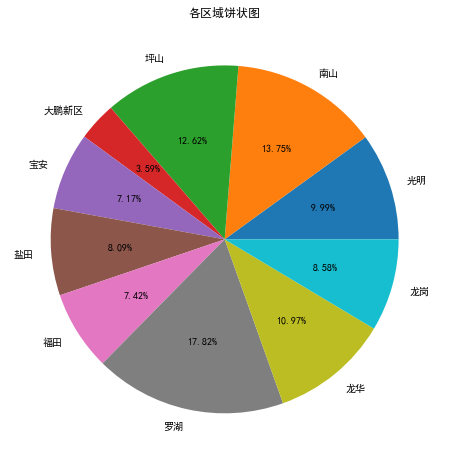

In [11]:
# 饼状图
data.groupby('区域')['房间数'].count()
ans1 = data[['区域','房间数']].groupby('区域').count()
# 白色背景
plt.figure(figsize=(8,8),facecolor='white')
plt.pie(ans1['房间数'],labels=ans1.index,autopct='%.2f%%')
plt.title('各区域饼状图')

Text(0.5, 1.0, '各区域饼状图')

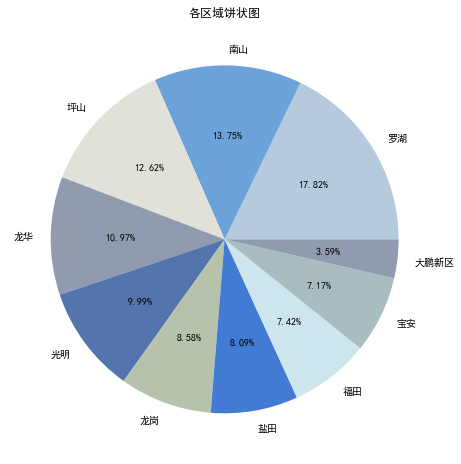

In [12]:
ans = data['区域'].value_counts()
colors = ['#B5CADC','#6CA2DA','#E1E0D9','#909BB0','#5474AE',
       '#B6C2AC','#417BD3','#CDE5EC','#A9BDC0','#909BB0']
plt.figure(figsize=(8,8),facecolor='white')
plt.pie(ans.values,labels=ans.index,autopct='%.2f%%',colors=colors)
plt.title('各区域饼状图')

# 各区域房价分布

In [13]:
# 箱线图
# 先分割不同区域的数据
for i in data['区域'].unique():
    index = data['区域']==i
    print(data.loc[index,:])

            区域  房间数  厅数      面积    楼层位置  楼层数  是否是学区房  地铁     平米单价
Unnamed: 0                                                       
228525652   龙华    2   2   79.20  middle    8       0   0   1.0101
228525545   龙华    2   1   79.03  middle    6       0   0   1.0123
228251431   龙华    2   1   79.03  middle    6       0   0   1.0376
228449030   龙华    2   2   68.30  middle   15       0   1   1.4348
227336478   龙华    3   2   88.70  middle   25       0   1   2.0744
...         ..  ...  ..     ...     ...  ...     ...  ..      ...
228648664   龙华    3   2   88.20    high   33       1   1  12.6984
228947359   龙华    4   2   89.30     low   31       1   1  12.8779
228940116   龙华    4   2   89.26     low   31       1   1  12.8837
227375364   龙华    3   1  104.00     low   31       1   1  13.2692
228924084   龙华    3   2   87.50  middle   28       1   1  13.4857

[1805 rows x 9 columns]
              区域  房间数  厅数     面积    楼层位置  楼层数  是否是学区房  地铁     平米单价
Unnamed: 0                                        

In [14]:
[data.loc[data['区域']==i,'平米单价'].values for i in data['区域'].unique()]

[array([ 1.0101,  1.0123,  1.0376, ..., 12.8837, 13.2692, 13.4857]),
 array([ 1.021 ,  1.0256,  1.1304,  1.1561,  1.1798,  1.2353,  1.25  ,
         1.2892,  1.8857,  1.9556,  2.0444,  2.0862,  2.1667,  2.1905,
         2.2519,  2.2647,  2.268 ,  2.2682,  2.2785,  2.2941,  2.3012,
         2.3082,  2.3134,  2.3205,  2.3206,  2.3226,  2.3318,  2.3341,
         2.3684,  2.3987,  2.4051,  2.4175,  2.4299,  2.4304,  2.44  ,
         2.44  ,  2.4468,  2.4485,  2.4518,  2.4638,  2.4732,  2.4742,
         2.4931,  2.5059,  2.5105,  2.5294,  2.534 ,  2.5364,  2.5506,
         2.5518,  2.5534,  2.56  ,  2.5647,  2.5676,  2.568 ,  2.5773,
         2.5773,  2.5851,  2.5873,  2.5882,  2.6   ,  2.6   ,  2.6   ,
         2.6   ,  2.6019,  2.6034,  2.6087,  2.6097,  2.6124,  2.6235,
         2.6273,  2.6327,  2.6333,  2.6382,  2.6403,  2.6435,  2.6563,
         2.6575,  2.6575,  2.6576,  2.6582,  2.6582,  2.6596,  2.66  ,
         2.6667,  2.6667,  2.6757,  2.6757,  2.686 ,  2.6874,  2.696 ,
        

In [15]:
{item:i for i,item in enumerate(data.columns)}

{'区域': 0,
 '房间数': 1,
 '厅数': 2,
 '面积': 3,
 '楼层位置': 4,
 '楼层数': 5,
 '是否是学区房': 6,
 '地铁': 7,
 '平米单价': 8}

In [16]:
data['区域'].unique()

array(['龙华', '大鹏新区', '坪山', '光明', '罗湖', '宝安', '南山', '盐田', '福田', '龙岗'],
      dtype=object)

Text(0.5, 1.0, '各区域箱线图')

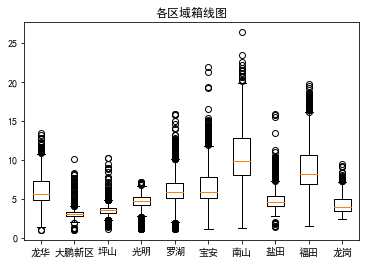

In [17]:
ans = []
for i in data['区域'].unique():
    ans.append(data.loc[data['区域']==i,'平米单价'].values)

boxplot_data = [data.loc[data['区域']==i,'平米单价'].values for i in data['区域'].unique()]
plt.boxplot(boxplot_data,labels=data['区域'].unique())
plt.title('各区域箱线图')

Text(0.5, 1.0, '各区域箱线图')

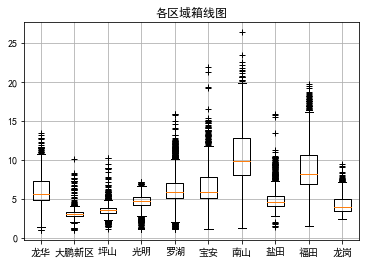

In [18]:
plt.grid()
plt.boxplot([data.loc[data['区域']==i,'平米单价'].values for i in data['区域'].unique()],
            labels=data['区域'].unique(),
            sym="+")
plt.title('各区域箱线图')

# 不同房间数的房价分布情况

In [19]:
data['房间数'].unique()

array([2, 3, 1, 4, 5, 6, 7, 8, 9], dtype=int64)

Text(0.5, 1.0, '不同房间数的房价分布情况')

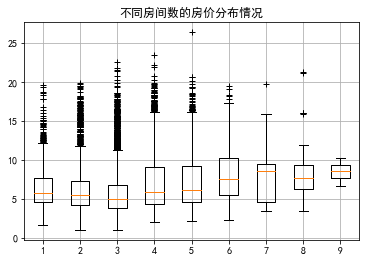

In [20]:
room_list = [i for i in range(1,10)]
plt.grid()
plt.boxplot([data.loc[data['房间数']==i,'平米单价'].values for i in room_list],sym='+')
plt.title('不同房间数的房价分布情况')

Text(0.5, 1.0, '不同房间数的房价分布情况')

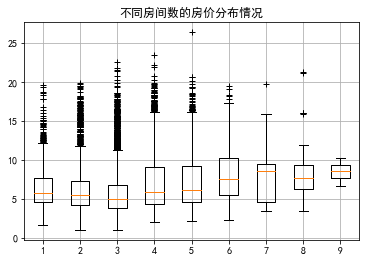

In [21]:
plt.grid()
plt.boxplot([data.loc[data['房间数']==i,'平米单价'].values for i in room_list],sym='+')
plt.title('不同房间数的房价分布情况')

Text(0.5, 1.0, '各区域房源数量和均价')

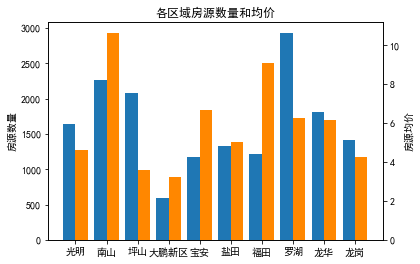

In [24]:
ans1 = data.groupby(['区域'])['平米单价'].mean() #计算房子单价
ans1.sort_index(inplace=True)

ans = data['区域'].value_counts() # 统计房源数量
ans.sort_index(inplace=True)

Fig = plt.figure()
ax= Fig.add_subplot(1,1,1) # 添加子图，和原图一样大
ax.bar(np.arange(10)-0.2,ans.values,width=0.4)
ax.set_xticks(np.arange(10),ans.index)
ax.set_ylabel('房源数量')
ax1 = ax.twinx() # 两个子图共享x轴
ax1.bar(np.arange(10)+0.2,ans1.values,width=0.4,color='#ff8700')
ax1.set_ylabel('房源均价')

plt.title('各区域房源数量和均价')

Text(0.5, 1.0, '地铁与房价的关系')

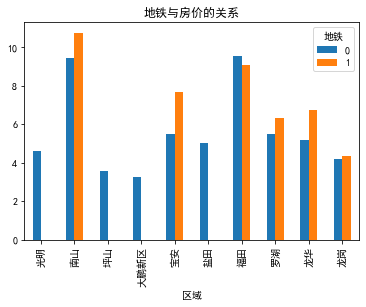

In [25]:
# 透视表
subway_money = pd.pivot_table(data=data,columns='地铁',index='区域',values='平米单价',aggfunc='mean')
subway_money.plot.bar() # 画柱状图
plt.title("地铁与房价的关系")

Text(0.5, 1.0, '学区房与房价的关系')

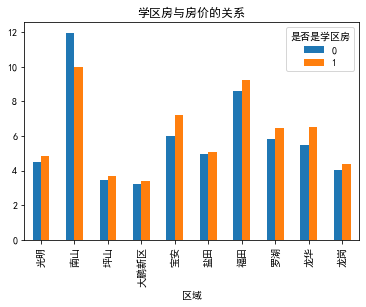

In [26]:
# 透视表
subway_money = pd.pivot_table(data=data,columns='是否是学区房',index='区域',values='平米单价',aggfunc='mean')
subway_money.plot.bar() # 画柱状图
plt.title("学区房与房价的关系")

In [27]:
# 面积和总房价的关系
data['总价'] = data['面积']*data['平米单价']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


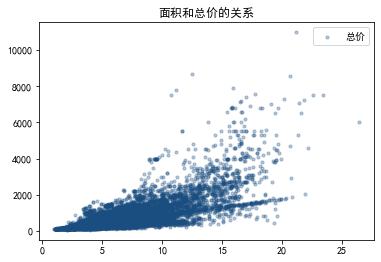

In [28]:
plt.scatter(data['平米单价'],data['总价'],s=10,c=(0.1,0.3,0.5),alpha=0.3,label='总价')
plt.title('面积和总价的关系')
plt.legend()

In [ ]:
# 探究学区房和地铁房对房价的综合影响
# 创建一个画布，有十个子图，放不同区域的数据
Fig = plt.figure(figsize=(10,5))
# 根据学区和地铁对各区数据进行透视
for i,item in enumerate(dist_dict.values()):
    df = data.loc[data['区域']==item,:]
    df_ans = df.pivot_table(index='是否是学区房',columns='地铁',values='平米单价',aggfunc='mean')
    ax = Fig.add_subplot(2,5,i+1)
    for x in df_ans.index:
        for y in df_ans.columns:
            ax.scatter(x,y,s=df_ans.loc[x,y]*40,color='r',alpha=df_ans.loc[x,y]/20)
    
    ax.set_xlim(-1,2)
    ax.set_ylim(-1,2)
    ## 图形修饰
    ax.set_xticks([0,1],['否','是'])
    ax.set_yticks([0,1],['否','是'])
    ax.set_xlabel('地铁房')
    ax.set_ylabel('学区房')
    ax.set_title(item)

plt.suptitle('学区和地铁对各区域的价格影响')
# 调用布局函数
plt.tight_layout()